In [ ]:
import os,sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from tqdm import tqdm
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from matplotlib.pyplot import cm

In [ ]:
train = pd.read_csv("train.csv", parse_dates=['timestamp'])
macro = pd.read_csv("macro.csv", parse_dates=['timestamp'])
train_data = pd.merge(train,macro, how='left', on='timestamp')

In [ ]:
train.shape

(30471, 292)

In [ ]:
train_data['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

#BiVariate Analysis

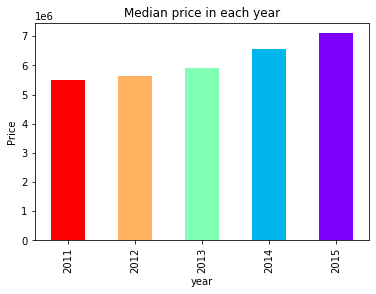

In [ ]:
train_data['year'] = train_data['timestamp'].map(lambda x: x.year)
xlabel = len(train_data['year'].unique())
colour=cm.rainbow(np.linspace(1,0,xlabel))
train_data.price_doc.groupby(train_data.year).median().plot.bar(color = colour)

plt.ylabel('Price')
plt.title('Median price in each year')

plt.show()

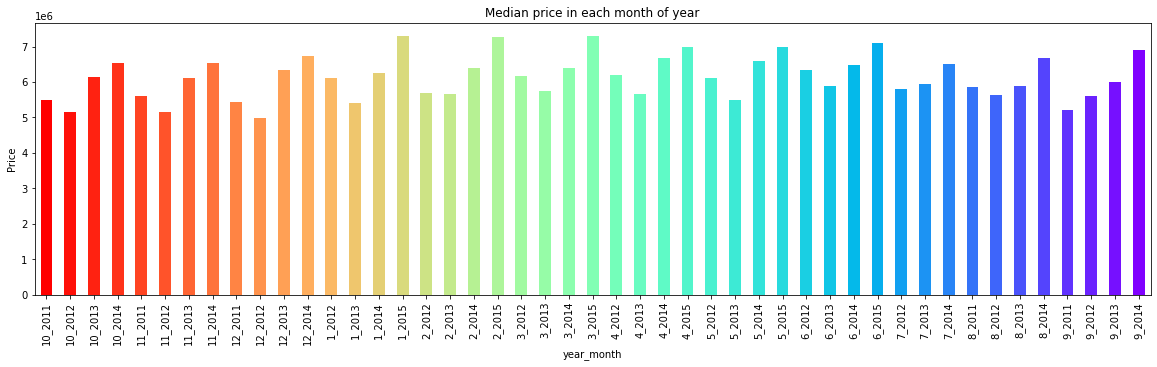

In [ ]:
train_data['year_month'] = train_data['timestamp'].map(lambda x: str(x.month)+'_'+str(x.year))

xlabel = len(train_data['year_month'].unique())

plt.figure(figsize=(20,5))

colour=cm.rainbow(np.linspace(1,0,xlabel))

# colour = [random.choice(list(cnames)) for i in range(xlabel)]
train_data.price_doc.groupby(train_data.year_month).median().plot.bar(color = colour)

plt.ylabel('Price')
plt.title('Median price in each month of year')

plt.show()

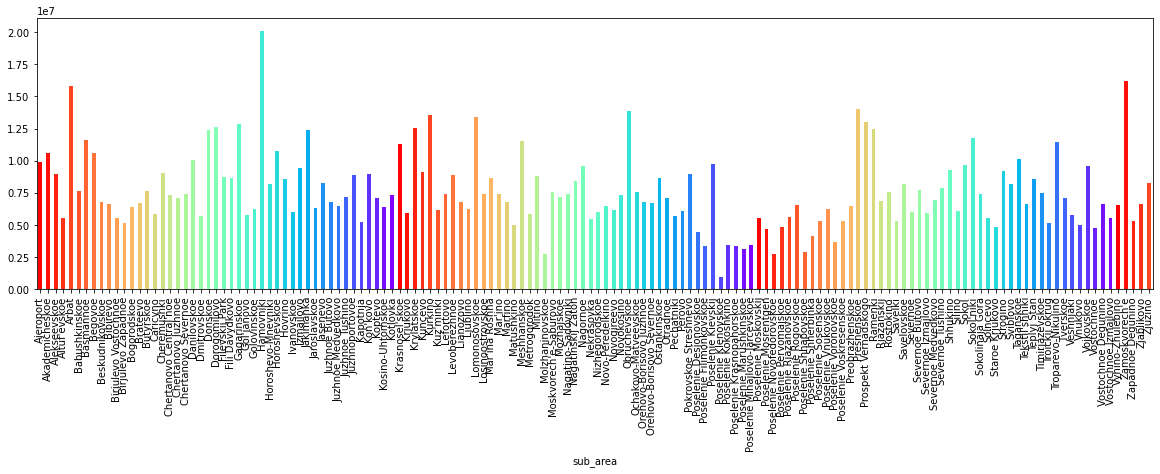

In [ ]:
plt.figure(figsize=(20,5))
train_data.price_doc.groupby(train_data.sub_area).mean().plot.bar(color = colour)
plt.show()

In [ ]:
arr = np.argsort(train_data.price_doc.groupby(train_data.sub_area).mean())

print("The district having highest average price is : ",arr.index[arr[-1]])
print("And the highest average price of the district "+arr.index[arr[-1]]+" is "+str(train_data.price_doc.groupby(train_data.sub_area).mean()[arr[-1]]))

print('*'*100)
print("The district having Lowest average price is : ",arr.index[arr[0]])
print("And the Lowest average price of the district "+arr.index[arr[0]]+" is "+str(train_data.price_doc.groupby(train_data.sub_area).mean()[arr[-1]]))

The district having highest average price is :  Hamovniki
And the highest average price of the district Hamovniki is 20116565.544444446
****************************************************************************************************
The district having Lowest average price is :  Poselenie Klenovskoe
And the Lowest average price of the district Poselenie Klenovskoe is 20116565.544444446


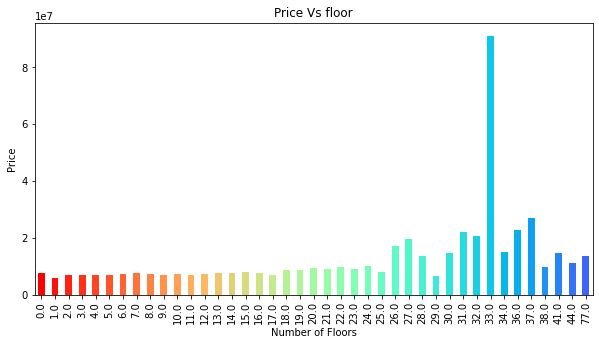

In [ ]:
plt.figure(figsize=(10,5))
train_data.price_doc.groupby(train_data.floor).mean().plot.bar(color = colour)

plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.title('Price Vs floor')
plt.show()

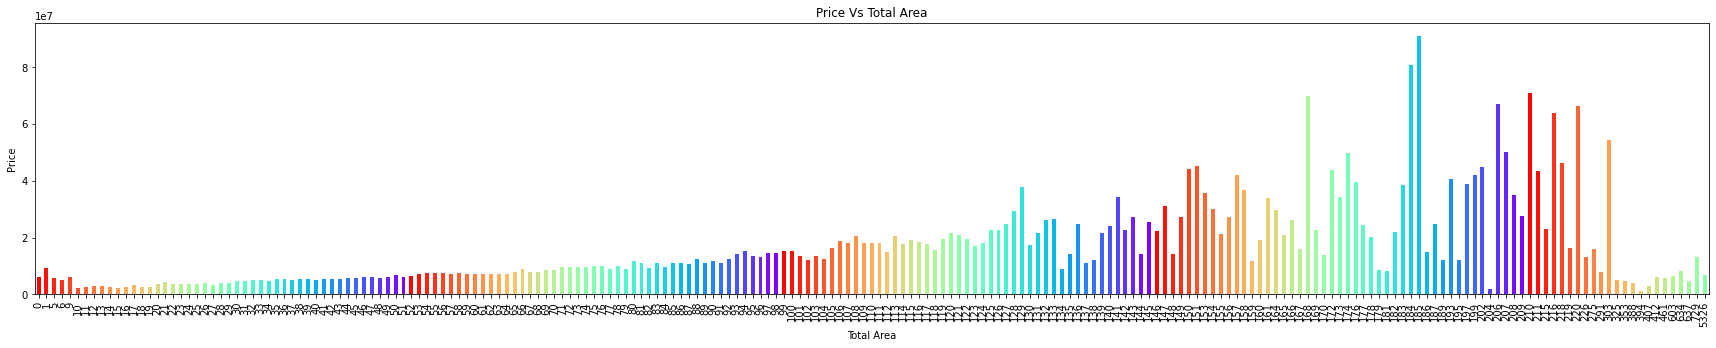

In [ ]:
plt.figure(figsize=(30,5))
train_data.price_doc.groupby(train_data.full_sq).mean().plot.bar(color = colour)
plt.title('Price Vs Total Area')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.show()

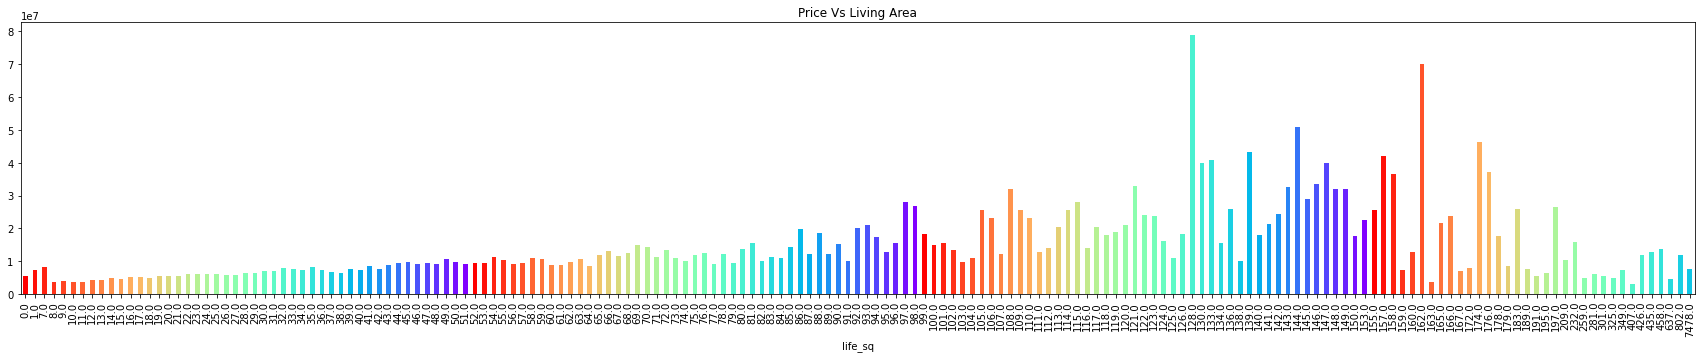

In [ ]:
plt.figure(figsize=(30,5))
train_data.price_doc.groupby(train_data.life_sq).mean().plot.bar(color = colour)
plt.title('Price Vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

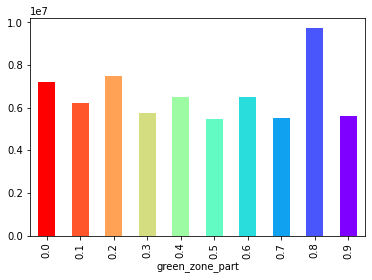

In [ ]:
df = train_data.copy()
df['green_zone_part'] = df.green_zone_part.round(1)
xlabel = len(train_data['green_zone_part'].unique())
colour=cm.rainbow(np.linspace(1,0,10))
#plt.figure(figsize=(10,10))
df.price_doc.groupby(df.green_zone_part).median().plot.bar(color = colour)
plt.show()

Before Removing Outliers


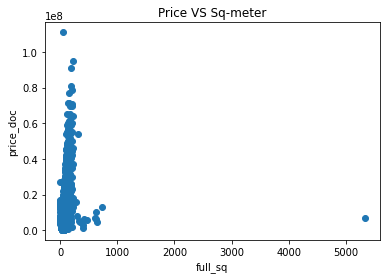

In [ ]:
print("Before Removing Outliers")

plt.scatter(train_data.full_sq,train_data.price_doc)
plt.xlabel('full_sq')
plt.ylabel('price_doc')
plt.title('Price VS Sq-meter')
plt.show()

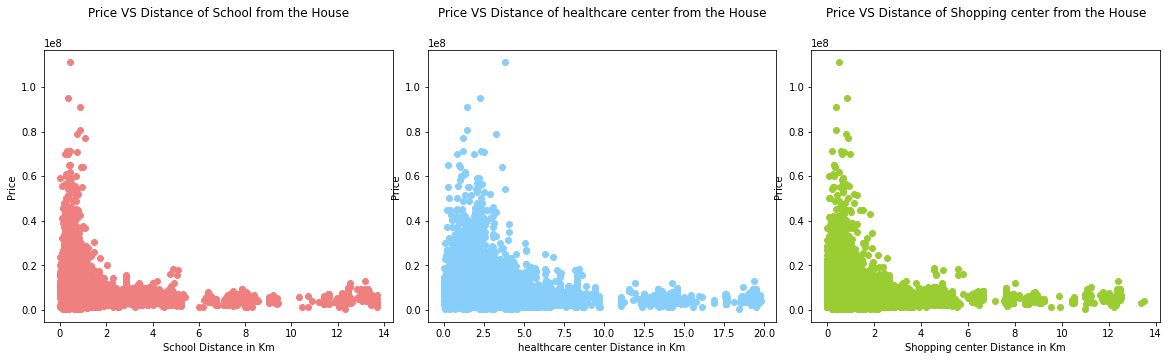

In [ ]:
# Removing Outliers

data = train_data[train_data.school_km<20]
data = data[data.public_healthcare_km<20]
data = data[data.shopping_centers_km<15]


plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.1)
plt.subplot(1,3,1)
plt.scatter(data.school_km,data.price_doc, color = 'lightcoral')
plt.xlabel('School Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of School from the House',x=0.5,y=1.1)


plt.subplot(1,3,2)
plt.scatter(data.public_healthcare_km,data.price_doc, color = 'lightskyblue')
plt.xlabel('healthcare center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of healthcare center from the House',x=0.5,y=1.1)

plt.subplot(1,3,3)
plt.scatter(data.shopping_centers_km,data.price_doc, color = 'yellowgreen')
plt.xlabel('Shopping center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Shopping center from the House',x=0.5,y=1.1)


plt.show()

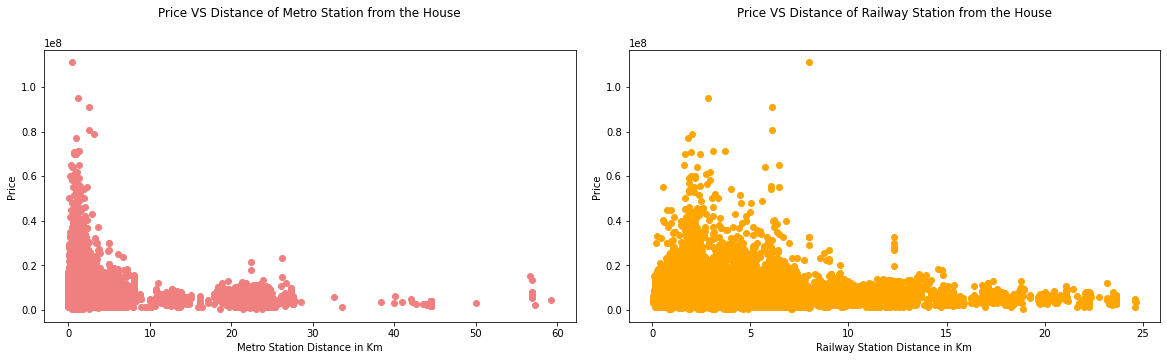

In [ ]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
plt.scatter(train_data.metro_km_walk,train_data.price_doc, color = 'lightcoral')
plt.xlabel('Metro Station Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Metro Station from the House',x=0.5,y=1.1)


plt.subplot(1,2,2)
plt.scatter(train_data.railroad_station_walk_km,train_data.price_doc, color = 'orange')
plt.xlabel('Railway Station Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Railway Station from the House',x=0.5,y=1.1)

plt.show()

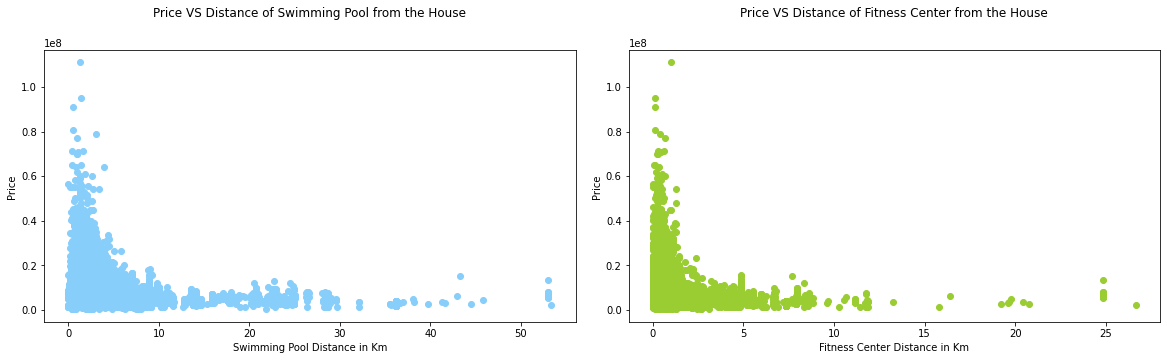

In [ ]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
plt.scatter(train_data.swim_pool_km,train_data.price_doc, color = 'lightskyblue')
plt.xlabel('Swimming Pool Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Swimming Pool from the House',x=0.5,y=1.1)

plt.subplot(1,2,2)
plt.scatter(train_data.fitness_km,train_data.price_doc, color = 'yellowgreen')
plt.xlabel('Fitness Center Distance in Km')
plt.ylabel('Price')
plt.title('Price VS Distance of Fitness Center from the House',x=0.5,y=1.1)
plt.show()

(30471, 292)


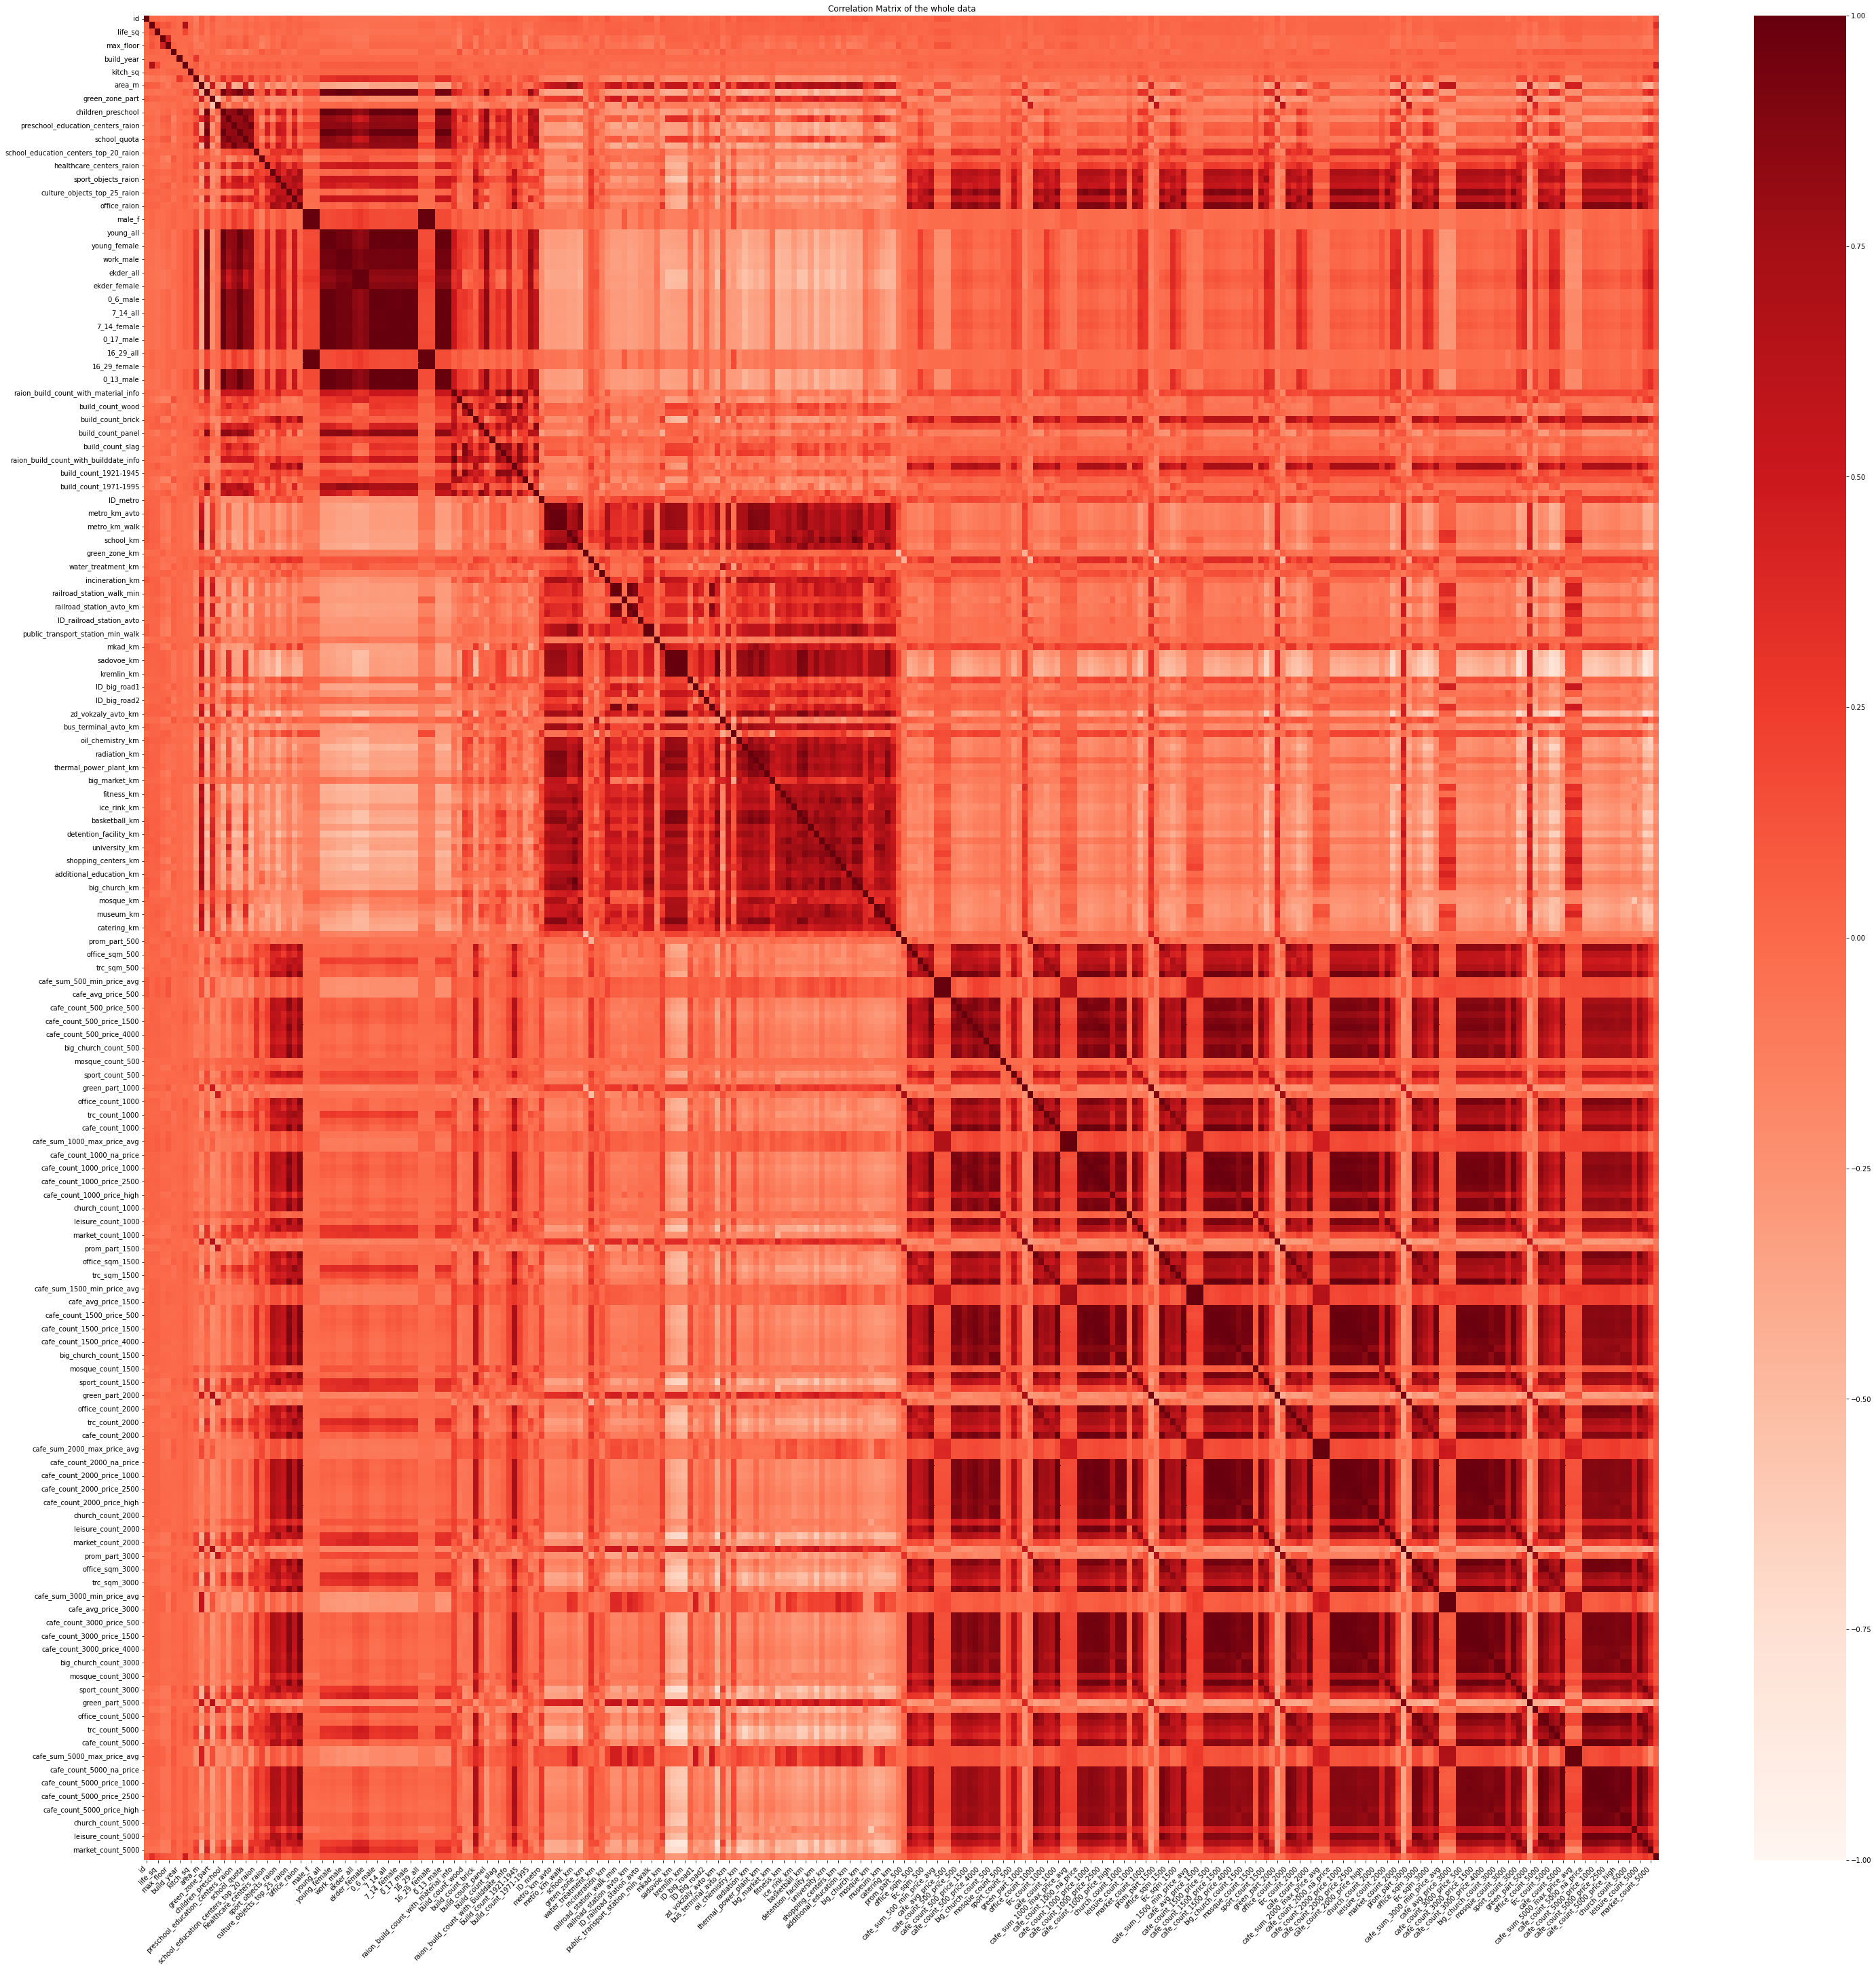

In [ ]:
print(train.shape)

corr = train.corr()
plt.figure(figsize=(50, 50))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap= plt.cm.Reds
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix of the whole data')
plt.show()

In [ ]:
#Correlation with output variable 
cor_target = abs(corr["price_doc"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.25]
relevant_features

full_sq                0.341840
num_room               0.476337
sport_objects_raion    0.252794
ttk_km                 0.272620
sadovoe_km             0.283622
bulvar_ring_km         0.279158
kremlin_km             0.279249
zd_vokzaly_avto_km     0.284069
nuclear_reactor_km     0.257946
sport_count_1500       0.258376
sport_count_2000       0.278056
sport_count_3000       0.290651
office_sqm_5000        0.269977
trc_count_5000         0.289371
trc_sqm_5000           0.268072
sport_count_5000       0.294864
price_doc              1.000000
Name: price_doc, dtype: float64

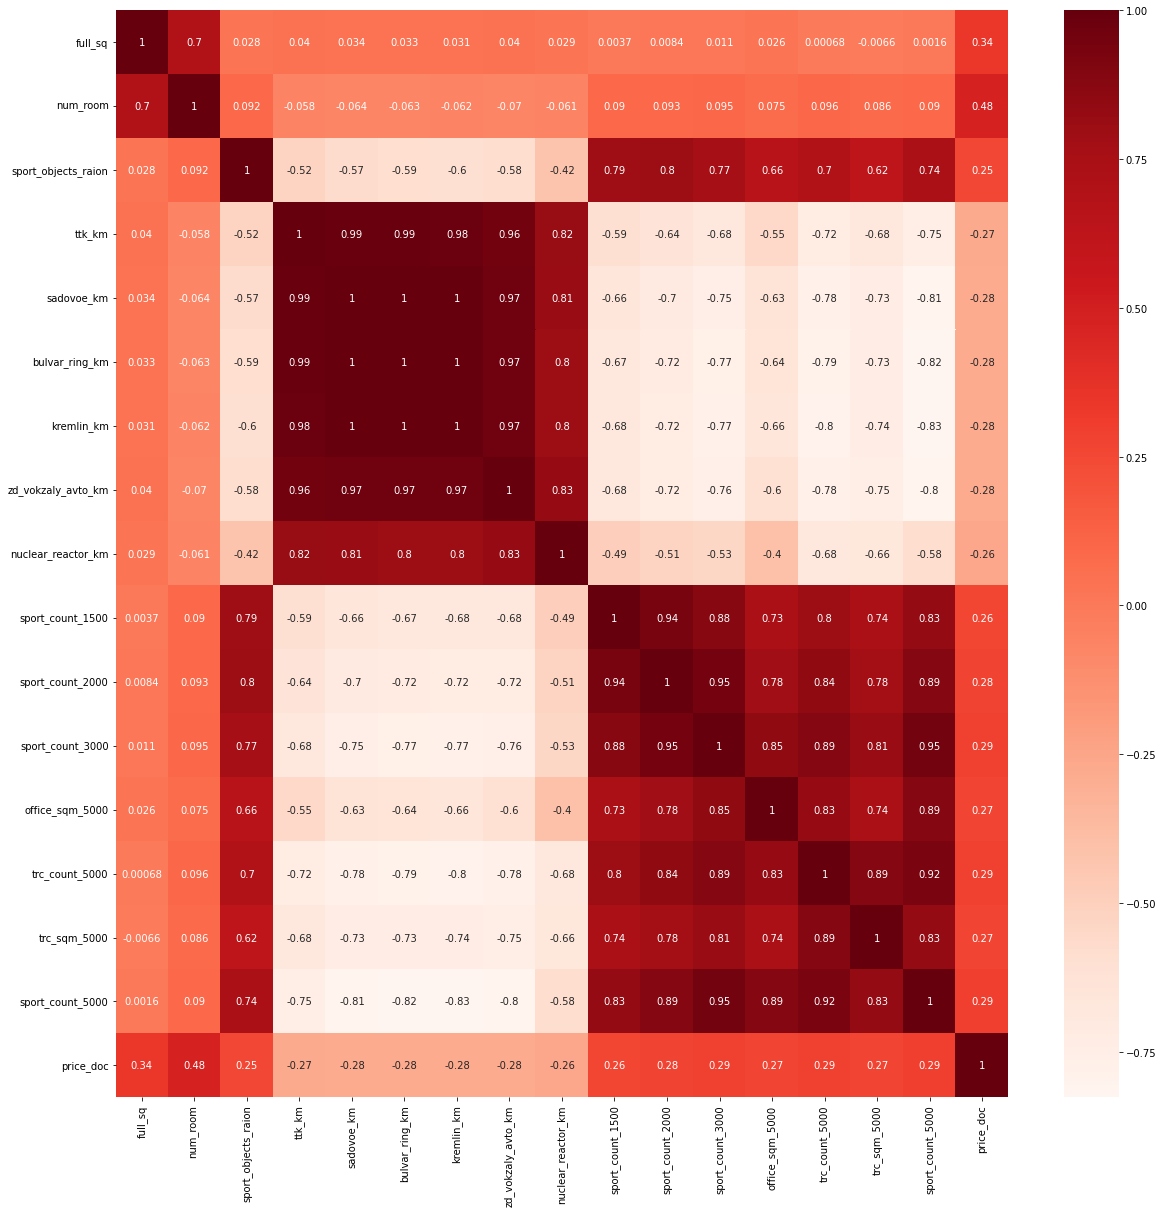

In [ ]:
plt.figure(figsize=(20,20))
cor = train[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

(2484, 100)


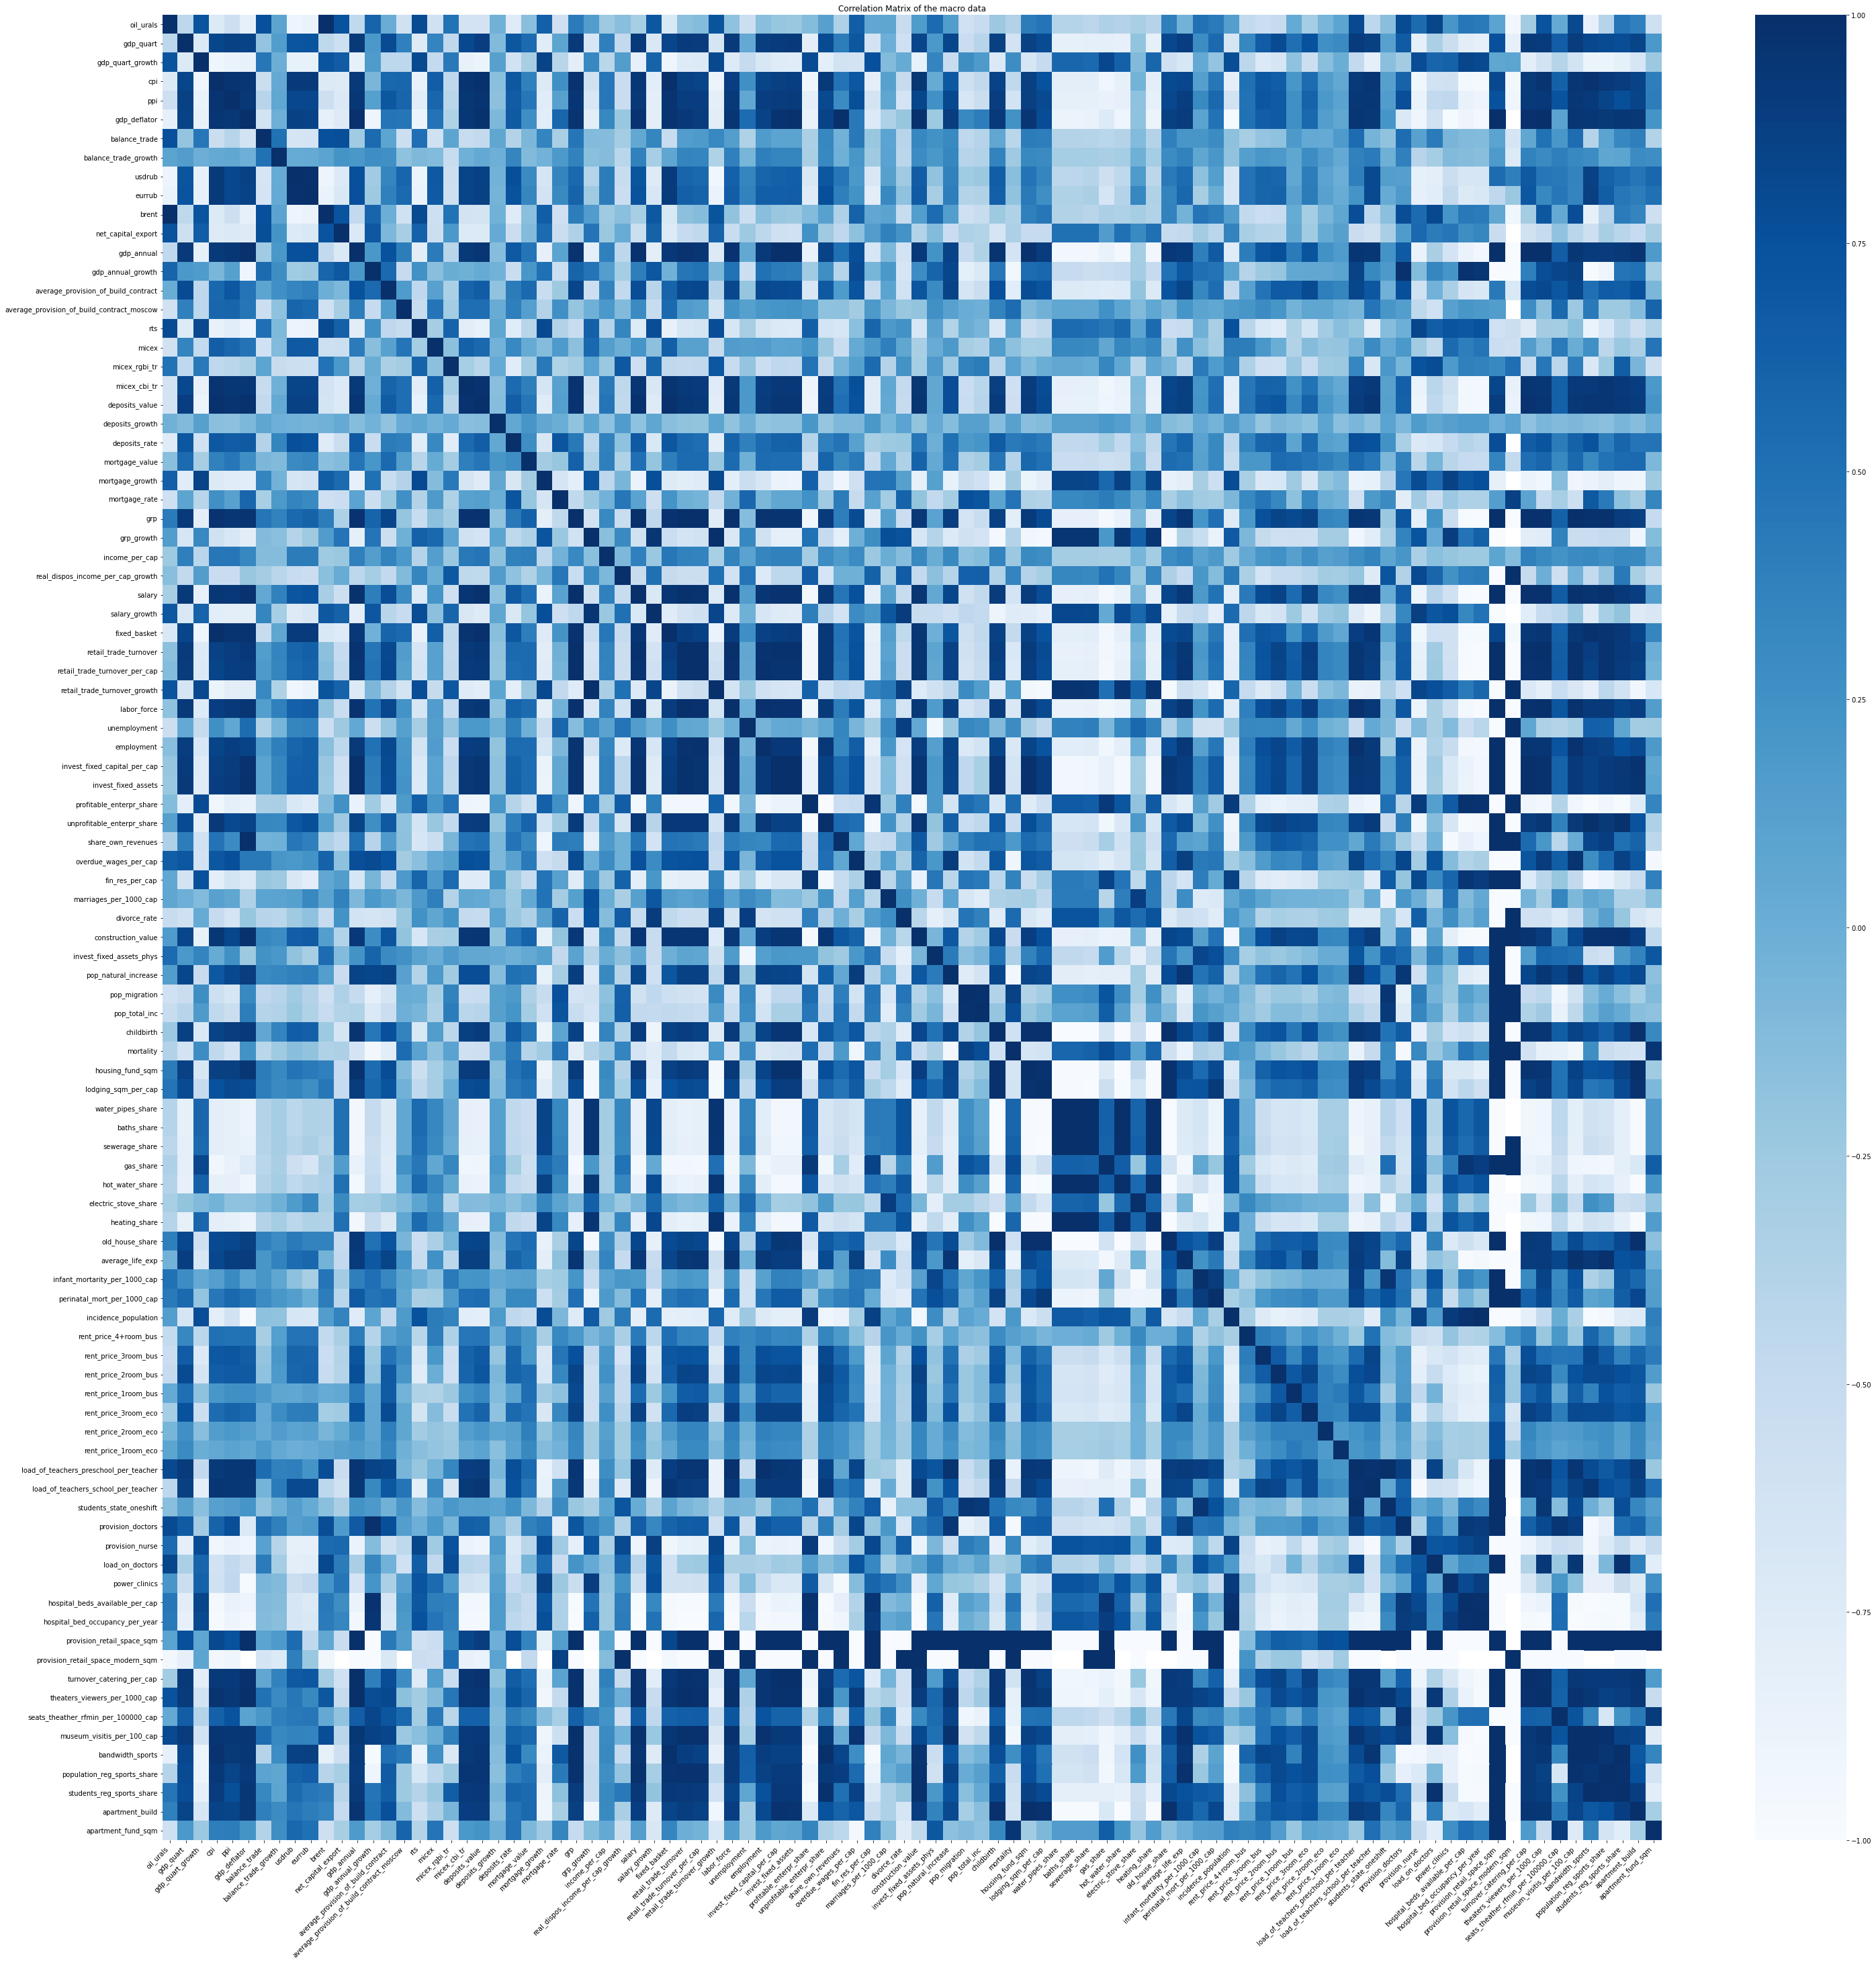

In [ ]:
print(macro.shape)

corr = macro.corr()
plt.figure(figsize=(50, 50))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap= 'Blues'
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix of the macro data')
plt.show()